In [29]:
#Dataset from Kaggle : https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [31]:
loan_data = pd.read_csv("loan_sanction_train.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
loan_data = loan_data.dropna()
print(loan_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [33]:
loan_data = loan_data.drop('Loan_ID', axis = 1)

In [34]:
# Colors used in the Notebook
colorsy = ['#7fc97f', '#beaed4', '#fdc086', '#386cb0', '#f0027f', '#bf5b17', '#666666', '#1b9e77', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666', '#8da0cb', '#fc8d62', '#66c2a5', '#ffd92f', '#e5c494', '#b3b3b3']

# Colors for loan status plots
tricolor = ['#386cb0', '#fdc086', '#beaed4']
duocolor = ['#66c2a5', '#fc8d62']
twocolor = ['#66c2a5', '#e7298a']

C:\Users\keren\AppData\Local\Temp\ipykernel_13232\3680213213.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



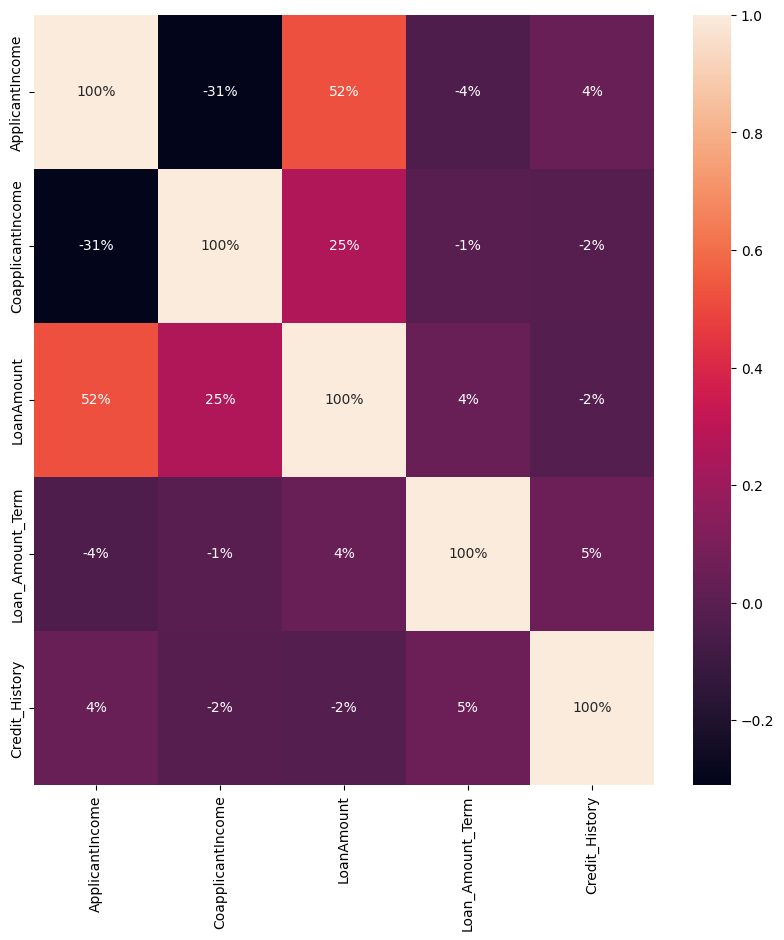

In [35]:
#Create a heatmap for correlations
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()

In [36]:
def get_loan_data(column):
    return loan_data[[column, 'Loan_Status']].groupby([column, 'Loan_Status']).agg(Count=('Loan_Status', 'count')).reset_index()

In [37]:
for col in ['Education', 'Gender', 'Self_Employed', 'Credit_History','Married']:
    df = get_loan_data(col)
    col_label = col.replace("_", " ")
    fig1 = px.bar(data_frame=df, x=col, y='Count', color='Loan_Status', barmode='group', color_discrete_sequence=tricolor, text_auto=True, template='simple_white')
    
    fig1.update_layout(yaxis_range=[0,350])
    fig1.update_yaxes(showgrid=True)
    fig1.update_xaxes(showgrid=True)
    
    fig1.update_layout(height=400, width=800,
                      title=f'<b>{col_label} Vs Loan Status</b>',
                      title_font_color="#000000",
                      title_font_size=20,
                      title_xanchor="center",
                      title_x=0.5,
                      xaxis_title=f"<b>{col_label}</b>",
                      yaxis_title="<b>Count</b>",
                      legend_title='<b>Loan Status</b>',
                      legend_title_font_color="#000000",
                      plot_bgcolor ='#ffffff')
    
    fig1.show()



In [38]:
grad_ratio = round(340 / 480, 3)
not_grad_ratio = round(82/134,3)
female_ratio = round(75/112,3)
male_ratio = round(339/489,3)
print("Loan approval in case of graduates and non-graduates")
print(grad_ratio, not_grad_ratio)
print("Loan approval in case of female and male")
print(female_ratio, male_ratio)

cred_ratio = round(7/89,3)
no_cred_ratio = round(378/475,3)
print("Loan approval in case of having credit histroy and not")
print(cred_ratio, no_cred_ratio)

Loan approval in case of graduates and non-graduates
0.708 0.612
Loan approval in case of female and male
0.67 0.693
Loan approval in case of having credit histroy and not
0.079 0.796


As we can see from out plots and analysis, we do not see significant impacts of graduates, gender, employment or marriage status because the chance of approval are similar in each different case. But we do see that having a credit history has a significant impact on getting a loan approval

In [39]:
loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']

fig = px.scatter(loan_data[loan_data['Loan_Status']=='Y'], x="Total_Income", y="LoanAmount",  
                hover_name="Loan_Status",title='<b>Total Income VS Approved Loan Amount</b>')
fig.update_yaxes(showgrid=True)
fig.update_xaxes(showgrid=True)

fig.update_layout(
    xaxis_title="<b>Total Income</b>",
    yaxis_title="<b>Loan Amount</b>",
    legend_title='<b>Property Area</b>',
)
fig.show()

In [40]:
pa_loan_df = loan_data.groupby(['Property_Area'])['LoanAmount'].agg(['count', 'sum']).reset_index()
pa_loan_df.columns = ['Property_Area', 'Loan_Count', 'Loan_Amount']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'xy'},{'type':'domain'}]], 
                    subplot_titles=['<b>Loan Count</b>', '<b>Loan Amount</b>'])

fig.add_trace(go.Bar(x=pa_loan_df['Property_Area'], y=pa_loan_df['Loan_Count'], text=pa_loan_df['Loan_Count'], 
                     marker_color=tricolor), row=1, col=1)
fig.add_trace(go.Pie(labels=pa_loan_df['Property_Area'], values=pa_loan_df['Loan_Amount'], textinfo='percent+label+value', 
                     marker_colors=tricolor), row=1, col=2)

fig.update_layout(height=400, width=1000, 
                  title_text="<b>Property Area wise Loan Distribution</b>",
                  showlegend=False)

fig.show()



In [41]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

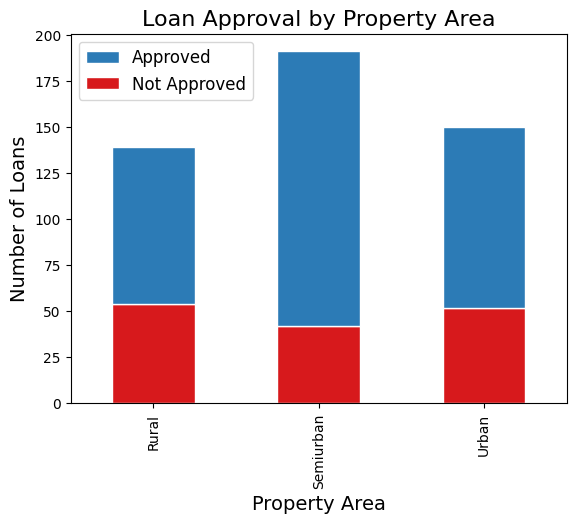

In [42]:
# group the data by property area and loan status
pa_approval_counts = pd.crosstab(loan_data['Property_Area'], loan_data['Loan_Status'])

# create a stacked bar chart
ax = pa_approval_counts.plot(kind='bar', stacked=True, color=['#d7191c','#2c7bb6'], edgecolor='white')

ax.set_xlabel('Property Area', fontsize=14)
ax.set_ylabel('Number of Loans', fontsize=14)
ax.set_title('Loan Approval by Property Area', fontsize=16)

handles, labels = ax.get_legend_handles_labels()
labels = ['Not Approved', 'Approved']
ax.legend(reversed(handles), reversed(labels), loc='upper left', fontsize=12)

plt.show()



From the scatterplot we can positive correlation between Total income and loan amount where the approved loan amount is increasing with the increase in Total income of applicants. 
Looking at Property area, we observe little impact of property areas on the chance of Loan Approval

One Hot Encoding

In [43]:
loan_data=loan_data.dropna()
loan_data['Dependents']=loan_data['Dependents'].replace('3+',3)
loan_data['Dependents']=loan_data['Dependents'].replace('2',2)
loan_data['Dependents']=loan_data['Dependents'].replace('1',1)
loan_data['Dependents']=loan_data['Dependents'].replace('0',0)
ohe=OneHotEncoder(sparse_output=False)
ohe_target = ['Gender', 'Property_Area','Married','Education','Self_Employed']
for i in ohe_target:
    transformed=ohe.fit_transform(loan_data[[i]])
    loan_data[ohe.categories_[0]]=transformed
    loan_data=loan_data.drop(i,axis=1)

loan_data


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Female,Male,Rural,Semiurban,Urban,No,Yes,Graduate,Not Graduate
1,1,4583,1508.0,128.0,360.0,1.0,N,6091.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,3000,0.0,66.0,360.0,1.0,Y,3000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0,2583,2358.0,120.0,360.0,1.0,Y,4941.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0,6000,0.0,141.0,360.0,1.0,Y,6000.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,2,5417,4196.0,267.0,360.0,1.0,Y,9613.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Y,2900.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
610,3,4106,0.0,40.0,180.0,1.0,Y,4106.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
611,1,8072,240.0,253.0,360.0,1.0,Y,8312.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
612,2,7583,0.0,187.0,360.0,1.0,Y,7583.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# Logistic Regression

In [44]:

x = loan_data.drop("Loan_Status", axis=1)
y = loan_data["Loan_Status"]

trainingX, testingX, trainingY, testingY = train_test_split(x, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(trainingX, trainingY)

pred_testingY = model.predict(testingX)
acc = accuracy_score(testingY, pred_testingY)

print("Accuracy:", acc)


Accuracy: 0.7083333333333334


Normalization 

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(trainingX)
X_train_norm
X_test_norm = scaler.transform(testingX)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_norm , trainingY)

pred_testingY = model.predict(X_test_norm)
pred_trainingY = model.predict(X_train_norm) #predict training dataset
acc = accuracy_score(testingY, pred_testingY)
est_acc = accuracy_score(trainingY, pred_trainingY)

print(acc)

0.7708333333333334


In [46]:
Confusion Matrix

SyntaxError: invalid syntax (1753241233.py, line 1)

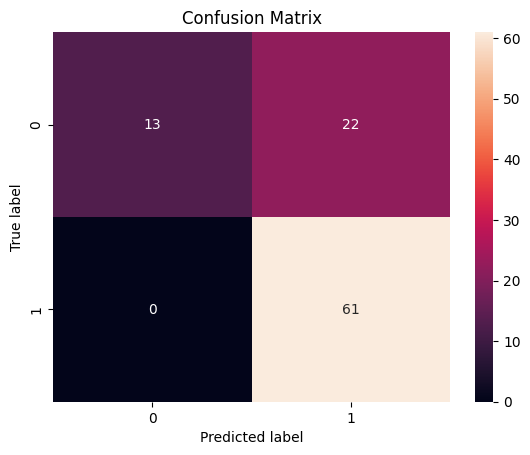

Precision: [1.         0.73493976]


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

# Create a confusion matrix
cm = confusion_matrix(testingY, pred_testingY)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision
precision = precision_score(testingY, pred_testingY, average=None)
print("Precision:", precision)


# Model #2

**`Balancing classes`**

As we have many values ​​of a class "Y" and few values ​​of "N", we will balance the classes using OverSampling to make the classes balanced and avoid model from becoming biassed towards one class.

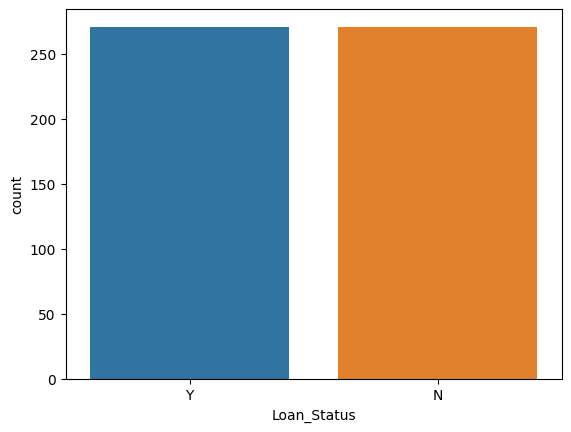

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_norm, trainingY = ros.fit_resample(X_train_norm, trainingY)
ax = sns.countplot(x=trainingY)

#### Decision Tree
#### Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.

#### Applying GridSearch
#### Here we are applying GridSearch to check which are the best metrics to use.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train_norm, trainingY)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

#### Decision Tree - GridSearch

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.8673122663948352


#### Running Decision Tree Classifier.

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 4, max_depth= 11, random_state=0) #Using Gridsearch parameters
decision_tree.fit(X_train_norm, trainingY)
previsoes  = decision_tree.predict(X_test_norm)
y_pred = decision_tree.predict(X_test_norm)#Accuracy on the test data

In [ ]:
y_pred_train = decision_tree.predict(X_train_norm)#Accuracy on the train data

#### Result

In [ ]:
# Make predictions on the train data
from sklearn.metrics import accuracy_score
ea = accuracy_score(trainingY, y_pred_train)
print(ea)

0.966789667896679


96% accuracy on the training set

In [ ]:
# Make predictions on the test data
from sklearn.metrics import accuracy_score
a = accuracy_score(testingY, y_pred)
print(a)

0.75


75% accuracy on the testing set

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision = precision_score(testingY, y_pred, average=None)

print("Precision:", precision)

Precision: [0.66666667 0.79365079]


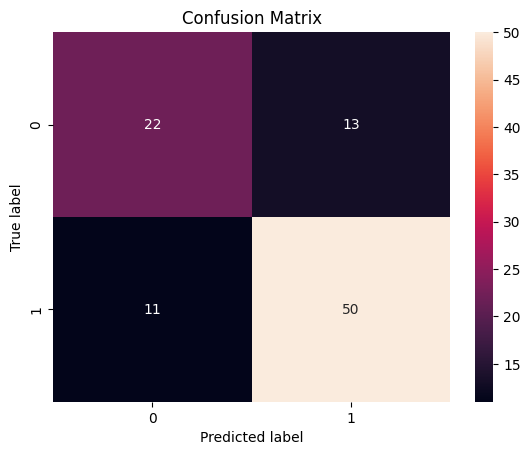

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(testingY, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()